<a href="https://colab.research.google.com/github/Errimy/recommendationsystem/blob/main/Collaborative_Recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Cleaning & Pre-processing

The first step when making an AI model, is to clean and pre-process the data.
To create a collaborative filtering system, we used Python as the programming language and Google Colab as a Jupyter Notebook on the cloud, the first step was the data cleaning & pre-processing, which was contained in four files: **‘events.csv’, ‘category_tree.csv’, ’item_properties_part1.csv’ and item_properties_part2.csv’**.


### Events.csv

The file **‘event.csv’** consists of 5 columns: timestamp, visitorid, event, itemid, transactionid. It represents the data of each event that happened between visitors and items, with the timestamp when the event occurred and the type of the event (*‘view’, ‘addtocart’,’transaction’*), there are **2.7 million** rows in this file.

After removing the rows with no value in the events column, and replacing the NaN values with 0 in the transactionid column, we changed the format of the timestamp into a more readable and easier to analyse format.

We start by importing the libraries and loading the file.

In [ ]:
import pandas as pd
import matplotlib as plt
import seaborn as sns


In [ ]:
df_event = pd.read_csv('/content/events.csv')

In [ ]:
df_event

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908.0,NaN
1,1433224214164,992329,view,248676.0,NaN
2,1433221999827,111016,view,318965.0,NaN
3,1433221955914,483717,view,253185.0,NaN
4,1433221337106,951259,view,367447.0,NaN
...,...,...,...,...,...
1042547,1440528081053,198153,view,100393.0,NaN
1042548,1440528226574,100439,view,35221.0,NaN
1042549,1440528671248,1299570,view,192491.0,NaN
1042550,1440526544633,255855,view,246753.0,NaN


In [ ]:
df_event.describe()

,timestamp,visitorid,itemid,transactionid
count,1.042552e+06,1.042552e+06,1.042551e+06,8604.000000
mean,1.436513e+12,7.024984e+05,2.345849e+05,8801.793352
std,2.575177e+09,4.051597e+05,1.341712e+05,5111.416000
min,1.433138e+12,1.000000e+00,3.000000e+00,0.000000
25%,1.434259e+12,3.523330e+05,1.179060e+05,4353.750000
50%,1.435346e+12,7.015570e+05,2.355490e+05,8752.500000
75%,1.439248e+12,1.056217e+06,3.506290e+05,13245.750000
max,1.440569e+12,1.407579e+06,4.668670e+05,17671.000000


In [ ]:
type(df_event['timestamp'])

pandas.core.series.Series

Missing values

checking for null values in each column, and deleting the rows with no events

In [ ]:
df_event.isnull().sum()

timestamp              0
visitorid              0
event                  1
itemid                 1
transactionid    1033948
dtype: int64

In [ ]:
result = df_event['transactionid'] == 0

In [ ]:
df_event.drop(df_event[df_event['event'] == 0].index, inplace=True)

In [ ]:
result

0          False
1          False
2          False
3          False
4          False
           ...  
1042547    False
1042548    False
1042549    False
1042550    False
1042551    False
Name: transactionid, Length: 1042552, dtype: bool

Then filling the null values of the column **[transactionid]** with 0

In [ ]:
df_event['transactionid'].fillna(0, inplace=True)

In [ ]:
df_event

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908.0,0.0
1,1433224214164,992329,view,248676.0,0.0
2,1433221999827,111016,view,318965.0,0.0
3,1433221955914,483717,view,253185.0,0.0
4,1433221337106,951259,view,367447.0,0.0
...,...,...,...,...,...
1042547,1440528081053,198153,view,100393.0,0.0
1042548,1440528226574,100439,view,35221.0,0.0
1042549,1440528671248,1299570,view,192491.0,0.0
1042550,1440526544633,255855,view,246753.0,0.0


 Changing the timestamp format into a more readable format

In [ ]:
df_event['timestamp'] = pd.to_datetime(df_event['timestamp'], unit='ms')

In [ ]:
df_event

,timestamp,visitorid,event,itemid,transactionid
0,2015-06-02 05:02:12.117,257597,view,355908.0,0.0
1,2015-06-02 05:50:14.164,992329,view,248676.0,0.0
2,2015-06-02 05:13:19.827,111016,view,318965.0,0.0
3,2015-06-02 05:12:35.914,483717,view,253185.0,0.0
4,2015-06-02 05:02:17.106,951259,view,367447.0,0.0
...,...,...,...,...,...
1042547,2015-08-25 18:41:21.053,198153,view,100393.0,0.0
1042548,2015-08-25 18:43:46.574,100439,view,35221.0,0.0
1042549,2015-08-25 18:51:11.248,1299570,view,192491.0,0.0
1042550,2015-08-25 18:15:44.633,255855,view,246753.0,0.0


In [ ]:

df_event['timestamp'] = pd.to_datetime(df_event['timestamp'])

df_event['year'] = df_event['timestamp'].dt.year
df_event['month'] = df_event['timestamp'].dt.month
df_event['day'] = df_event['timestamp'].dt.day
df_event['time'] = df_event['timestamp'].dt.strftime('%H:%M:%S')
df_event['hour'] = df_event['timestamp'].dt.hour

In [ ]:
df_event.dropna(subset=['event'], inplace=True)

In [ ]:
df_event.isnull().sum()

Dropping Duplicate Rows

In [ ]:
duplicate_rows = df_event[df_event.duplicated()]

In [ ]:
duplicate_rows

In [ ]:
df_event1 = df_event.drop_duplicates()

In [ ]:
duplicate_rows1 = df_event1[df_event.duplicated()]

In [ ]:
duplicate_rows1

Saving the cleansed version of the csv file:

In [ ]:
df_event1.to_csv('cleansed_event.csv', index=False)

In [ ]:
df_month=pd.readcsv('/content/cleansed_event.csv')
print(df_month)

### Item_properties_part1.csv & Item_properties_part2.csv

The **‘item_properties_part2.csv’** is a continuation of the **‘item_properties_part1.csv’**, they both consist of the following columns: timestamp, itemid, property, value. These files represent the properties of each item, approximatly **20 million** rows.

Before performing any cleaning or pre-processing operation, we merged the data from both files into a single dataframe, the data didn’t contain any null values, nor did it contain duplicate rows. The format of the timestamp column was changed in the same way as the timestamp column in the **‘event.csv’** file.

Loading the Item_properties files

In [ ]:
item_pro1 = pd.read_csv("/item_properties_part1.csv")
item_pro2 = pd.read_csv("/item_properties_part2.csv")

In [ ]:
item_pro1.head()

In [ ]:
item_pro1.shape

In [ ]:
item_pro2.head()

In [ ]:
len(item_pro2)

Merging the two files into one

In [ ]:
item_pro = pd.concat([item_pro1, item_pro2], ignore_index=True)

In [ ]:
item_pro.head()

In [ ]:
len(item_pro)

In [ ]:
item_pro.dtypes

#### Duplicate values

In [ ]:
item_pro.duplicated().value_counts()

There is no duplicate values

#### Null values

In [ ]:
item_pro.isnull().sum()

There is no null values

Conversion of the timestamp column

In [ ]:
item_pro['timestamp']

In [ ]:
item_pro['timestamp'] = pd.to_datetime(item_pro['timestamp'], unit='ms')

In [ ]:
item_pro['timestamp']

Saving the data into a csv file named *'cleansed_item_pro.csv'*

In [ ]:
item_pro.to_csv('cleansed_item_pro.csv', index=False)

### CATEGORY ID

The **‘category_tree.csv’** file consists of two columns:  categoryid and parentid, the file contains **1669** rows.

We removed duplicate rows and replaced the null values of the parentid column to ‘0’.

Loading the category file

In [ ]:
df_category = pd.read_csv('/category_tree.csv')

In [ ]:
df_category

In [ ]:
df_category.describe()

Dropping the duplicates from the data

In [ ]:
df_category = df_category.drop_duplicates()

Number of unique values in the column **[categoryid]**

In [ ]:
print(df_category['categoryid'].nunique())

Checking for null values

In [ ]:
df_category.isnull().sum()

Replacing null values in the **[parentid]** column with 0

In [ ]:
df_category['parentid'].fillna(0, inplace=True)

Saving the data into a csv file named *'cleansed_category.csv'*

In [ ]:
df_category.to_csv('cleansed_category.csv', index=False)

# Partie Data Analysis

## Popular Items

For a better understanding of the data, we analyzed the data using matplotlib, starting by identifying the most popular products (the products that the visitors interacted with the most):

In [ ]:
df_events= pd.read_csv('/content/cleansed_event.csv')
popular_items= pd.DataFrame(df_events.groupby('itemid')['event'].count())
most_popular_items= popular_items.sort_values('event', ascending=False)
most_popular_items.head(10)

,event
itemid,
187946,3412
461686,2975
5411,2334
370653,1854
219512,1800
257040,1647
298009,1642
96924,1633
309778,1628


<Axes: xlabel='itemid'>

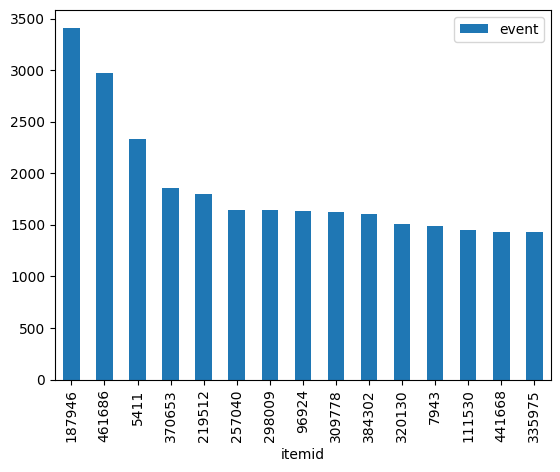

In [ ]:
most_popular_items.head(15).plot(kind = "bar")

## Best-Selling Items

After ranking the items by interactions, let's get more specific and rank them by transactions.

<Axes: xlabel='itemid'>

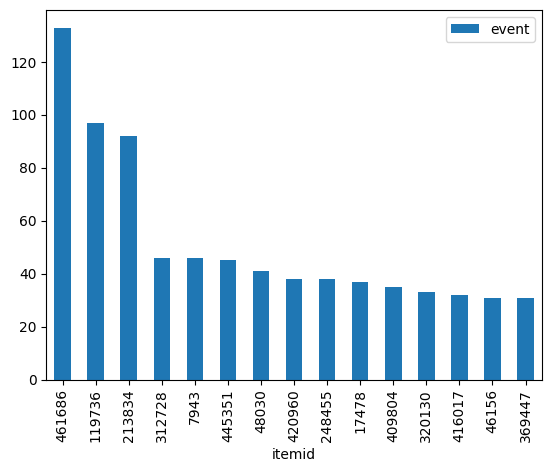

In [ ]:
transaction_events = df_events[df_events['event'] == 'transaction']
transactions_per_item= pd.DataFrame(transaction_events.groupby('itemid')['event'].count())
best_selling_items= transactions_per_item.sort_values('event', ascending=False)
best_selling_items.head(15).plot(kind = "bar")

### Notice:
Here we can see that there's a difference between the best selling items, and the items with whom the visitors interacted with the most.

## Most Transactions per Visitors

Ranking visitors by the number of the transactions they made, this will allow us to identify these users and gain more insights about their behavior.

<Axes: xlabel='visitorid'>

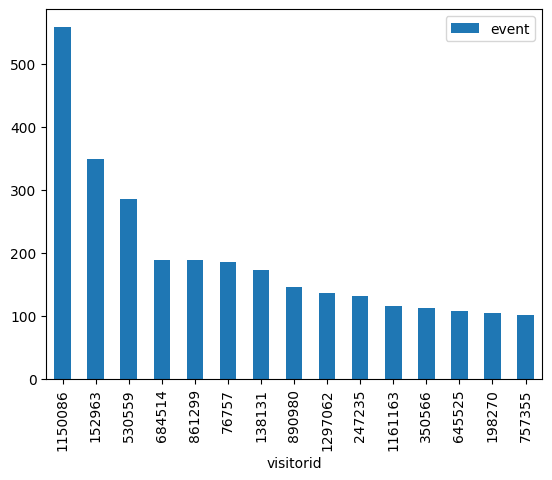

In [ ]:
popular_visitors= pd.DataFrame(transaction_events.groupby('visitorid')['event'].count())
most_transactions_by_visitors= popular_visitors.sort_values('event', ascending=False)
most_transactions_by_visitors.head(15).plot(kind = "bar")

# Partie ML

### Data Preparation

The given code reads event data from a CSV file, assigning numerical interaction values based on event types (view, addtocart, transaction). It then creates index mappings for unique item and visitor IDs and builds row and column indices for a sparse interaction matrix. Utilizing these indices and interaction values, the code constructs the sparse matrix representing interactions between visitors and items.

In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix

#Reading Data
events_df = pd.read_csv('/content/cleansed_event.csv')

#Defining Interaction Values
events_df['interaction_value'] = events_df['event'].apply(lambda x: 0.4 if x == 'view' else (0.6 if x == 'addtocart' else 0.8))

#Creating Index Maps
item_index_map = {item: idx for idx, item in enumerate(events_df['itemid'].unique())}
visitor_index_map = {visitor: idx for idx, visitor in enumerate(events_df['visitorid'].unique())}

#Building Row and Column Indices
row_indices = [visitor_index_map[visitor] for visitor in events_df['visitorid']]
col_indices = [item_index_map[item] for item in events_df['itemid']]

#Extracting Interaction Values
interaction_values = events_df['interaction_value']

#Creating the Interaction Matrix
interaction_matrix = csr_matrix((interaction_values, (row_indices, col_indices)),
                                 shape=(len(visitor_index_map), len(item_index_map)))

print(interaction_matrix)

  (0, 0)	0.4
  (0, 3415)	0.4
  (1, 1)	0.4
  (1, 2101)	0.4
  (1, 2421)	0.4
  (1, 4112)	0.4
  (1, 5444)	0.4
  (1, 8199)	0.4
  (1, 11416)	0.4
  (1, 15434)	0.4
  (1, 22492)	0.4
  (1, 24683)	0.8
  (1, 24728)	1.6
  (1, 31226)	0.4
  (1, 36863)	0.4
  (1, 37451)	0.4
  (1, 37950)	0.4
  (1, 37956)	0.4
  (1, 38232)	0.4
  (1, 38745)	0.8
  (1, 38934)	0.4
  (1, 50767)	0.8
  (1, 69304)	0.4
  (1, 73820)	0.4
  (1, 91821)	0.4
  :	:
  (1407555, 48561)	0.4
  (1407556, 34641)	0.4
  (1407557, 39000)	0.4
  (1407558, 1690)	0.4
  (1407559, 235058)	0.4
  (1407560, 17430)	0.4
  (1407561, 29900)	0.4
  (1407562, 12445)	0.4
  (1407563, 2355)	0.4
  (1407564, 7691)	0.4
  (1407565, 166698)	0.4
  (1407566, 235059)	0.4
  (1407567, 2579)	0.4
  (1407568, 235060)	0.4
  (1407569, 3982)	0.4
  (1407570, 32481)	0.4
  (1407571, 26557)	0.4
  (1407572, 9161)	0.4
  (1407573, 131858)	0.4
  (1407574, 47236)	0.4
  (1407575, 11786)	0.4
  (1407576, 64470)	0.4
  (1407577, 6875)	0.4
  (1407578, 8928)	0.4
  (1407579, 90304)	0.4


### Model Creation and training

In [ ]:
pip install surprise

The provided code utilizes the Surprise library to implement a recommendation system. It first loads event data into a Surprise dataset and then splits this data into training and testing sets. The SVD (Singular Value Decomposition) model is initialized, trained using the training set, and subsequently used to make predictions on the test set. The code then performs cross-validation, evaluating the model's performance using RMSE (Root Mean Squared Error) and MAE (Mean Absolute Error) metrics. Finally, the code calculates and prints the RMSE and MAE values, providing insights into the accuracy of the recommendation model's predictions.

In [ ]:
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate


# Load data and create a Surprise dataset
reader = Reader(rating_scale=(0, 1))
data = Dataset.load_from_df(events_df[['visitorid', 'itemid', 'interaction_value']], reader)

# Split data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2)

# Initialize and train the model
model = SVD()
model.fit(trainset)

# Make predictions on the test set
predictions = model.test(testset)

# Calculate RMSE and MAE
cross_validate(model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

print("RMSE:", rmse)
print("MAE:", mae)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.0683  0.0683  0.0683  0.0685  0.0684  0.0684  0.0001  
MAE (testset)     0.0410  0.0410  0.0410  0.0411  0.0411  0.0411  0.0000  
Fit time          64.38   71.49   70.06   71.13   69.53   69.32   2.57    
Test time         4.36    4.41    4.41    8.10    7.68    5.79    1.72    
RMSE: 0.0685
MAE:  0.0411
RMSE: 0.06853251483829577
MAE: 0.04113052617354568


Saving the model

In [ ]:
from surprise.dump import dump

model_filename = 'trained_model.pkl'
dump(model_filename, algo=model)

In [ ]:
from surprise.dump import load
loaded_model = load(model_filename)[1]

### Recommendations

This code defines a function called **get_top_n_recommendations** that takes a trained recommendation model, a specific user ID, the total number of items in the dataset (num_items), and an optional parameter n (default set to 10). The function predicts ratings for each item for the given user, sorts these predictions in descending order, and returns the top n items with the highest estimated ratings as recommendations. It then reads event data from a CSV file, specifies a user ID, calculates the number of unique items in the dataset, calls the **get_top_n_recommendations** function with the loaded model, and prints the top recommended items along with their estimated ratings for the specified user.

In [ ]:
def get_top_n_recommendations(model, user_id, num_items, n=10):
    recommendations = []
    for item_id in range(1, num_items + 1):
        prediction = model.predict(user_id, item_id)
        recommendations.append((item_id, prediction.est))

    # Sort recommendations by estimated rating
    recommendations.sort(key=lambda x: x[1], reverse=True)

    top_n_recommendations = recommendations[:n]
    return top_n_recommendations
import pandas as pd
events_df = pd.read_csv('/content/cleansed_event.csv')
user_id = 1
num_items = events_df['itemid'].nunique()  # Number of unique items in the dataset
top_recommendations = get_top_n_recommendations(loaded_model, user_id, num_items, n=10)
print("Top Recommendations for User", user_id)
for item_id, estimated_rating in top_recommendations:
    print("Item:", item_id, "Estimated Rating:", estimated_rating)

Top Recommendations for User 1
Item: 133472 Estimated Rating: 0.501883503370965
Item: 193990 Estimated Rating: 0.5005390579557638
Item: 224991 Estimated Rating: 0.5000306493486697
Item: 192582 Estimated Rating: 0.4969437262512333
Item: 28789 Estimated Rating: 0.49516420492126617
Item: 188377 Estimated Rating: 0.4937422080911881
Item: 118024 Estimated Rating: 0.49130570312626887
Item: 181830 Estimated Rating: 0.4910667480199934
Item: 213834 Estimated Rating: 0.49089194769614075
Item: 176669 Estimated Rating: 0.48953638250304427
